# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [1]:
import pandas as pd
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('../data/PJME_hourly.csv',index_col='Datetime',parse_dates=True)
df.sort_index(inplace=True)

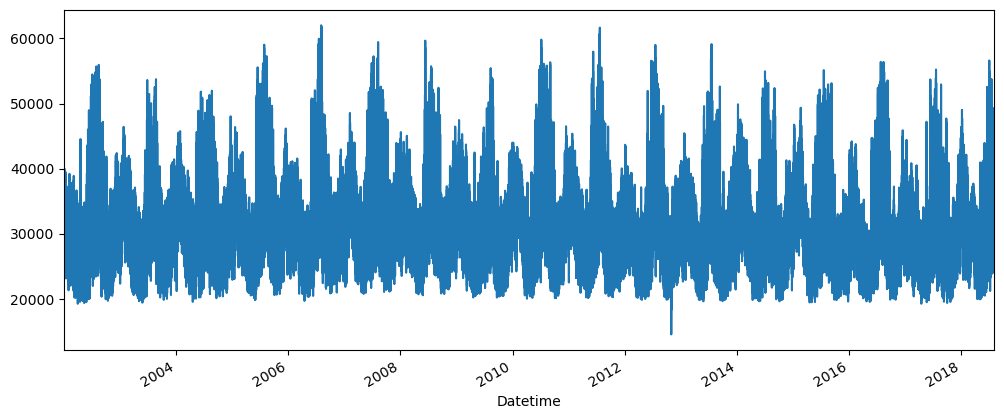

In [57]:
df['PJME_MW'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [4]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

,PJME_MW
Datetime,
2002-01-01 01:00:00,NaN
2002-01-01 02:00:00,NaN
2002-01-01 03:00:00,NaN
2002-01-01 04:00:00,NaN
2002-01-01 05:00:00,NaN
2002-01-01 06:00:00,NaN
2002-01-01 07:00:00,28847.571429
2002-01-01 08:00:00,28733.571429
2002-01-01 09:00:00,28830.428571


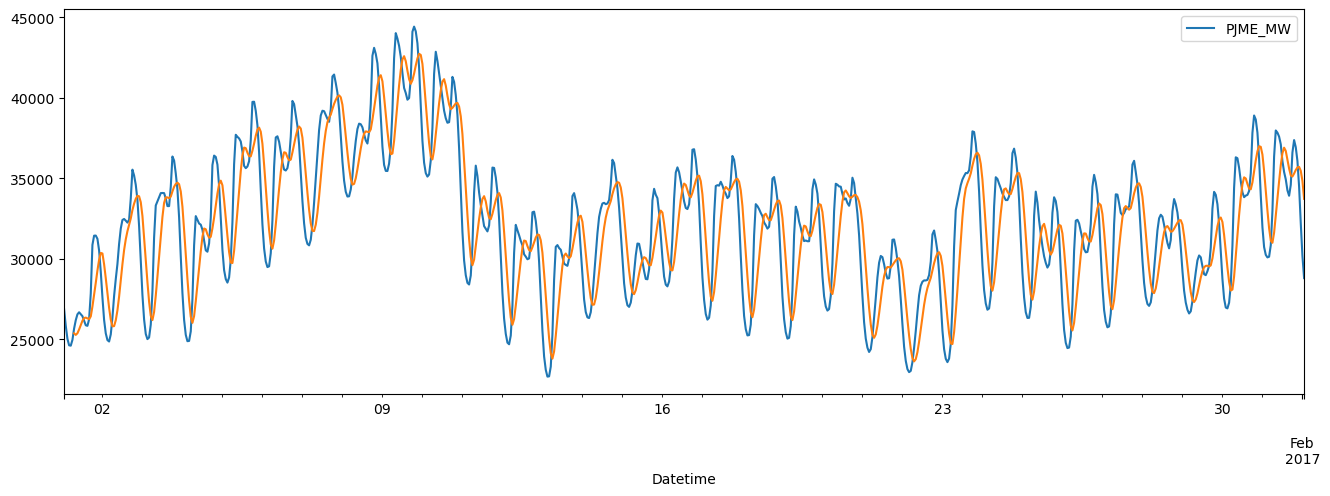

In [7]:
df201701 = df.loc[(df.index >= '2017-01-01 01:00:00') & (df.index <= '2017-02-01 01:00:00')].copy()
df201701.plot(figsize=(16,5)).autoscale(axis='x')
df201701.rolling(window=7).mean()['PJME_MW'].plot();

The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

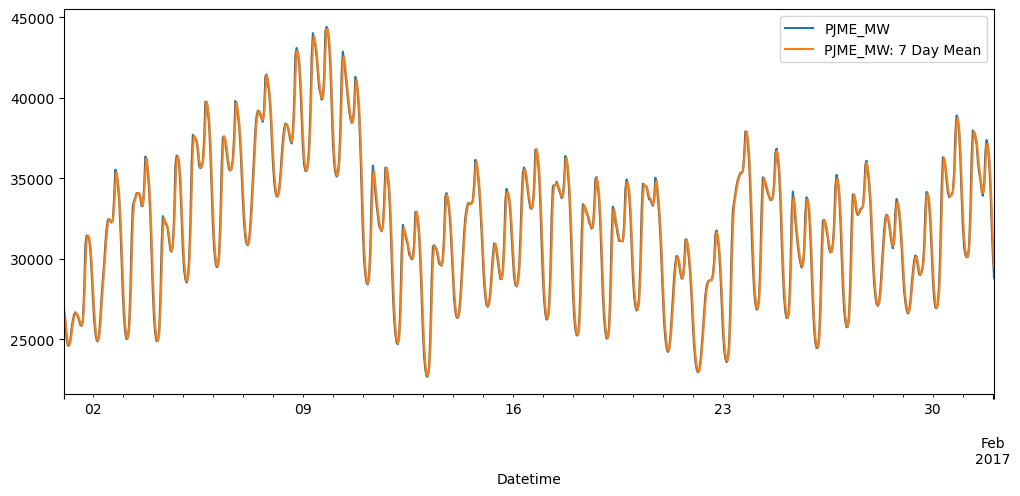

In [31]:
df201701['PJME_MW: 7 Day Mean'] = df201701['PJME_MW'].rolling(window=2).mean()
df201701[['PJME_MW','PJME_MW: 7 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [30]:
for t in range(2,360):
    print(f'range {t}')
    test = df['PJME_MW'][t:]
    predictions = df.rolling(window=t).mean()['PJME_MW'][t:]
    print("MAE", metrics.mean_absolute_error(test, predictions))
    print("MAPE", metrics.mean_absolute_percentage_error(test, predictions))

range 2
MAE 554.729785228805
MAPE 0.017629685769216735
range 3
MAE 1081.936143768818
MAPE 0.03444410844281257
range 4
MAE 1577.3971636328615
MAPE 0.05034282960156143
range 5
MAE 2036.5501090388755
MAPE 0.06516608660780163
range 6
MAE 2453.152940974134
MAPE 0.07868953066037486
range 7
MAE 2822.506956667876
MAPE 0.09072111010881496
range 8
MAE 3138.720963070488
MAPE 0.10100880496905354
range 9
MAE 3399.6618150102468
MAPE 0.10947861330072807
range 10
MAE 3613.9848337873905
MAPE 0.11644287345661489
range 11
MAE 3786.843145777892
MAPE 0.12206970780889002
range 12
MAE 3924.075169929965
MAPE 0.126542752606121
range 13
MAE 4034.9009070226375
MAPE 0.13015680199865046
range 14
MAE 4125.017686620853
MAPE 0.13309572910910453
range 15
MAE 4196.7073704343275
MAPE 0.13545282057318875
range 16
MAE 4247.10818498452
MAPE 0.13714170248803362
range 17
MAE 4272.265069510181
MAPE 0.13803114661648405
range 18
MAE 4270.544336886491
MAPE 0.13805852615956515
range 19
MAE 4239.979430712637
MAPE 0.137152418209833

In [147]:
origin = df.iloc[len(df) - 10:].copy()
train = df.iloc[len(df) - 10 : len(df) - 3].copy()
test = df.iloc[len(df) - 3:].copy()

In [148]:
naive_forecast_value = train.iloc[-1]['PJME_MW']
naive_forecast = train.copy()

In [149]:
for date in test.index:
    naive_forecast.loc[date, 'PJME_MW'] = naive_forecast_value

<Axes: xlabel='Datetime'>

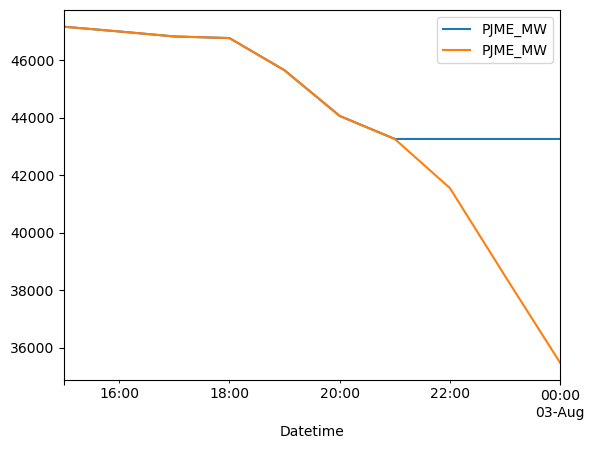

In [150]:
ax = naive_forecast.plot()
origin.plot(ax=ax)

In [151]:
print("MAE", metrics.mean_absolute_error(test, naive_forecast[7:]))
print("MAPE", metrics.mean_absolute_percentage_error(test, naive_forecast[7:]))

MAE 4743.333333333333
MAPE 0.12783363786751692


In [217]:
window_forecast = train.copy()

In [218]:
for date in test.index:
    window_forecast.loc[date, 'PJME_MW'] = None

In [225]:
window_forecast['PJME_MW'] = window_forecast['PJME_MW'].fillna(window_forecast['PJME_MW'].rolling(3,min_periods=1).mean())

<Axes: xlabel='Datetime'>

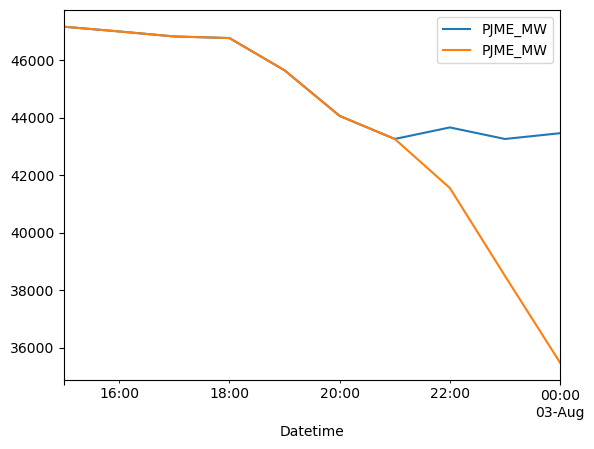

In [227]:
ax = window_forecast.plot()
origin.plot(ax=ax)

In [228]:
print("MAE", metrics.mean_absolute_error(test, window_forecast[7:]))
print("MAPE", metrics.mean_absolute_percentage_error(test, window_forecast[7:]))

MAE 4943.583333333333
MAPE 0.13292750311021292
